In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (14,8)

In [3]:
import os

os.chdir("/workspaces/Humanitarian-activity-analysis/")

In [4]:
activity = pd.read_csv("Data/activity.csv", index_col = 'Unnamed: 0')

activity = activity.set_index("month")

activity.head()

,sessions,sessions_mapped,sessions_validated,sessions_mapped_hours,sessions_validated_hours,projects_active,projects_new,users,users_mapper,users_validator,...,cum_sessions,cum_sessions_mapped,cum_sessions_validated,cum_projects,cum_users,cum_users_mapper,cum_users_validator,cum_countries,filter,tasking_manager_dump_timestamps
month,,,,,,,,,,,,,,,,,,,,,
2012-11-01,130,97,32,194.0,64.0,2,2,12,12,1,...,130.0,97.0,32.0,2.0,12.0,12.0,1.0,2.0,all,2023-01-02 23:59:40.539208
2012-12-01,2713,2302,379,4604.0,758.0,25,24,102,97,27,...,2843.0,2399.0,411.0,26.0,108.0,104.0,28.0,8.0,all,2023-01-02 23:59:40.539208
2013-01-01,3334,3167,127,6334.0,254.0,41,23,120,115,27,...,6177.0,5566.0,538.0,49.0,200.0,191.0,53.0,11.0,all,2023-01-02 23:59:40.539208
2013-02-01,2742,2310,333,4620.0,666.0,54,35,186,174,38,...,8919.0,7876.0,871.0,84.0,328.0,312.0,83.0,16.0,all,2023-01-02 23:59:40.539208
2013-03-01,2167,1629,483,3258.0,966.0,42,17,163,153,34,...,11086.0,9505.0,1354.0,101.0,429.0,410.0,107.0,18.0,all,2023-01-02 23:59:40.539208


In [5]:
def timeplot(df, cols):
    
    plt.rcParams.update({"font.size":14})
    
    df[cols].plot(figsize = (14,7))

    plt.xticks(rotation = 45)

    plt.show()

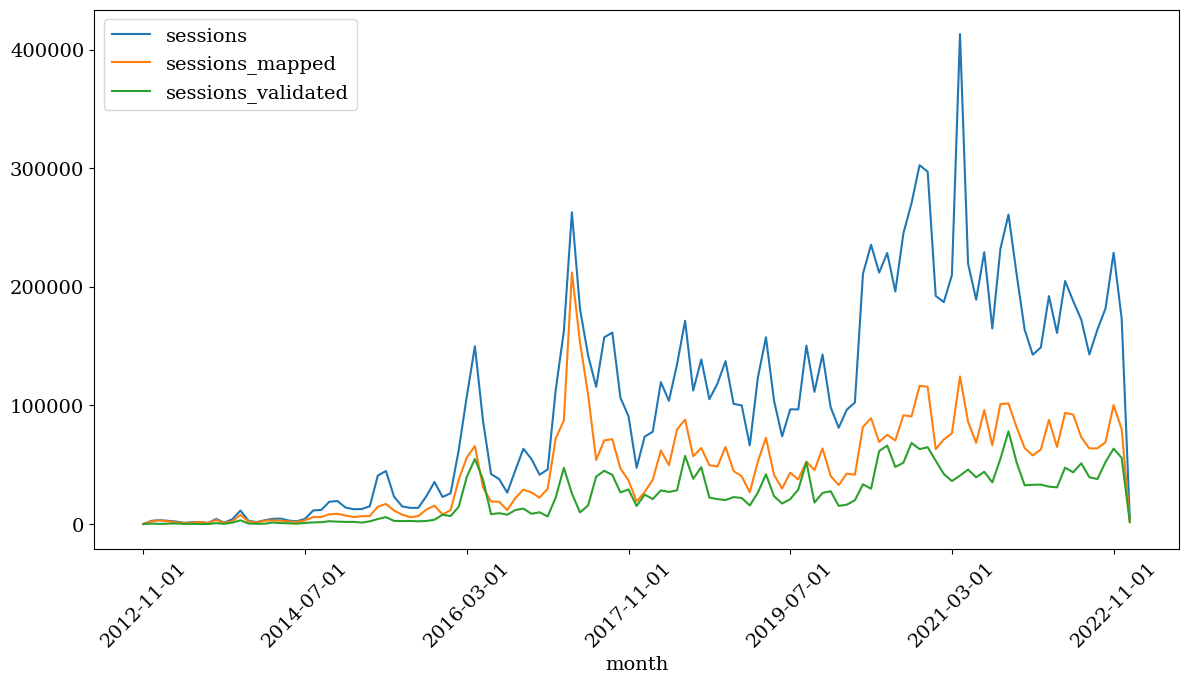

In [6]:
timeplot(activity,['sessions','sessions_mapped','sessions_validated'])

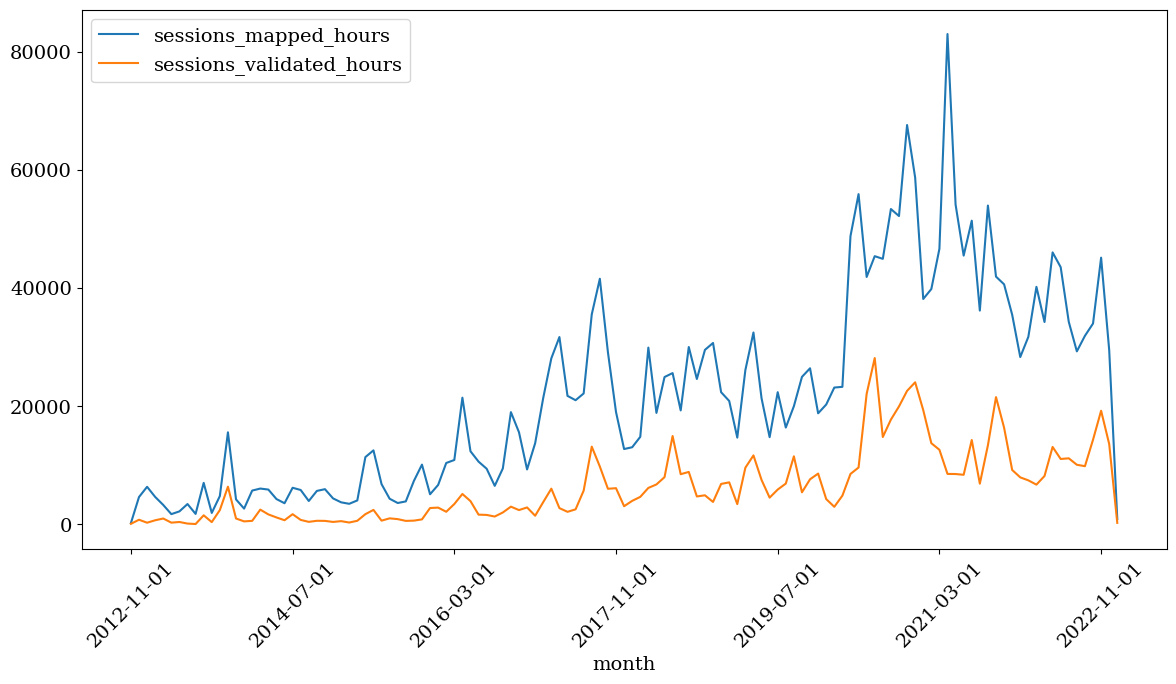

In [7]:
timeplot(activity,['sessions_mapped_hours', 'sessions_validated_hours'])

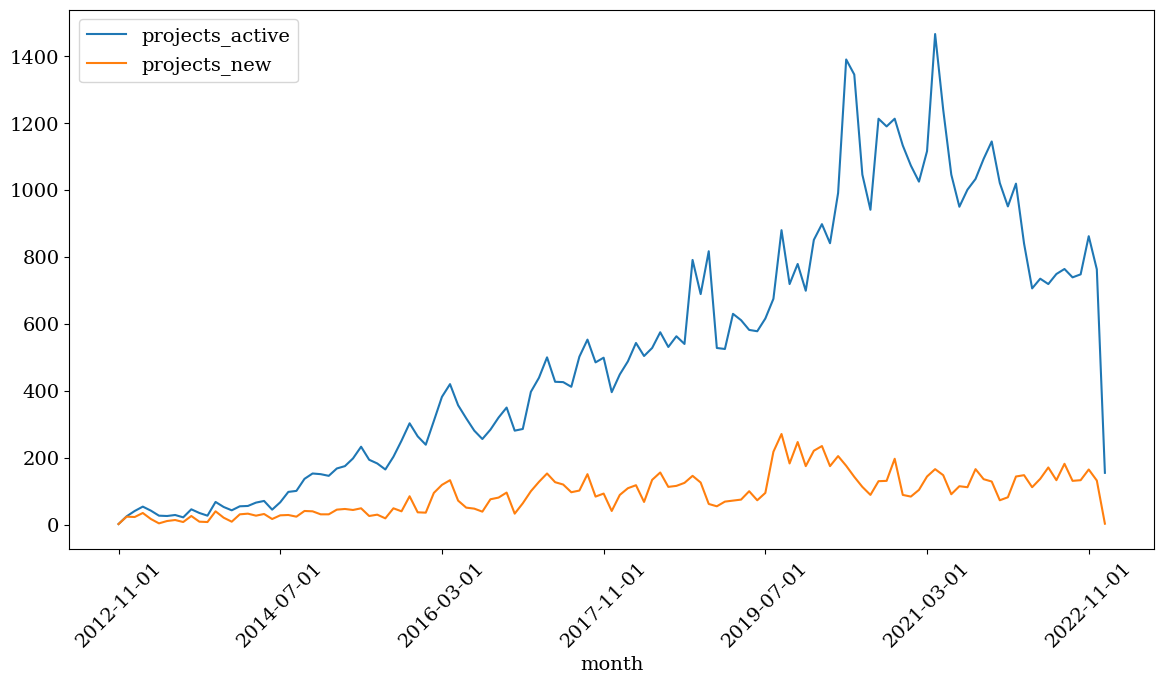

In [8]:
timeplot(activity,['projects_active','projects_new'])

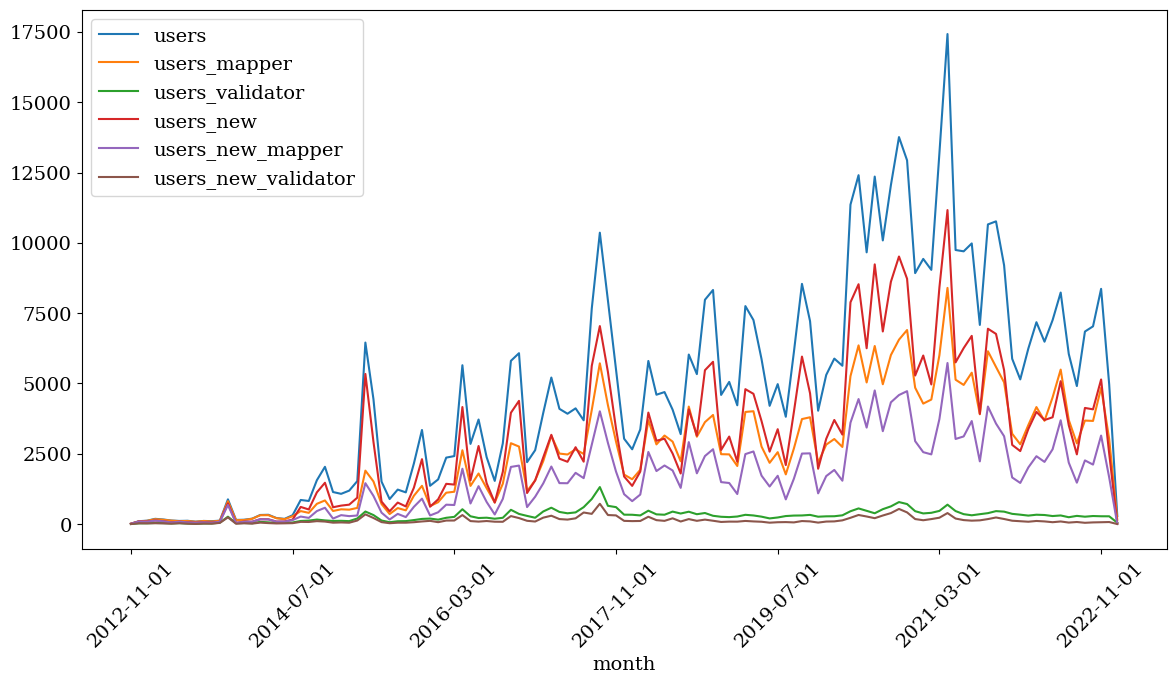

In [9]:
timeplot(activity,['users', 'users_mapper', 'users_validator', 'users_new',
       'users_new_mapper', 'users_new_validator'])

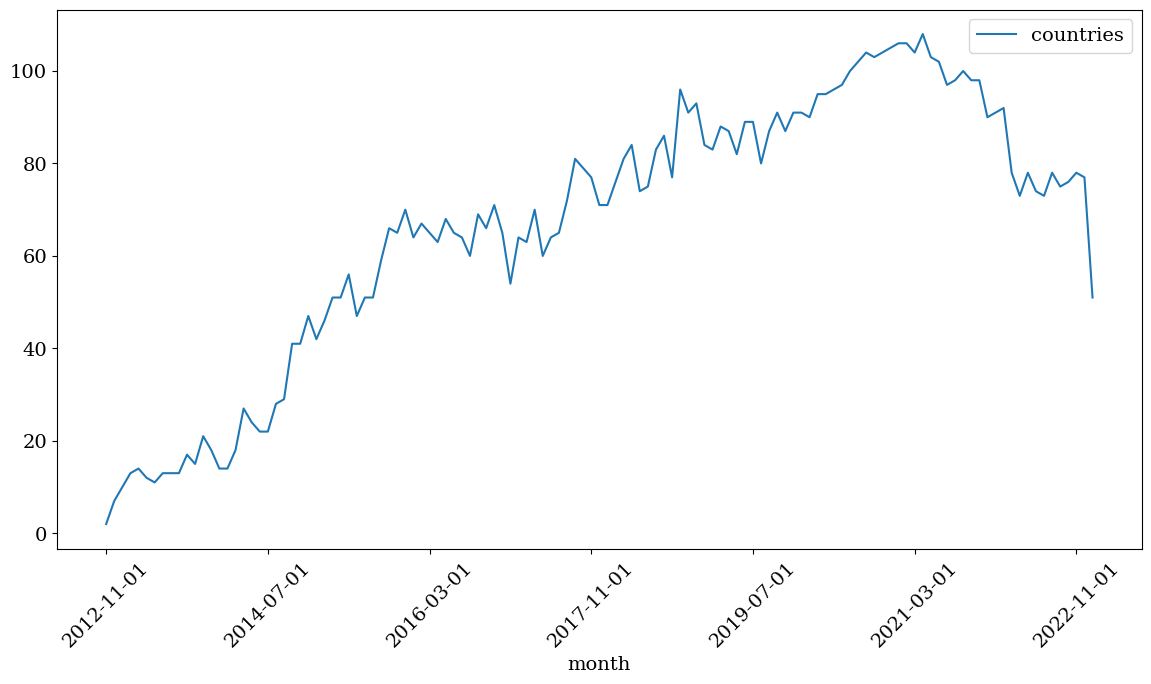

In [10]:
timeplot(activity,['countries'])

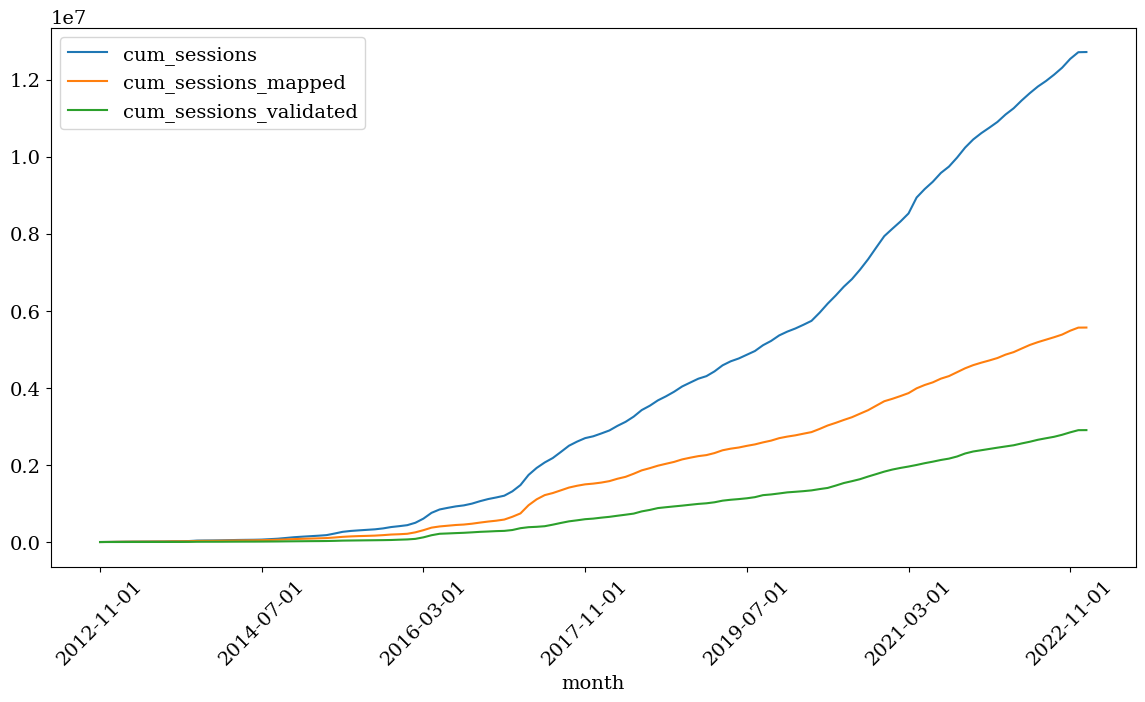

In [11]:
timeplot(activity,['cum_sessions', 'cum_sessions_mapped', 'cum_sessions_validated'])

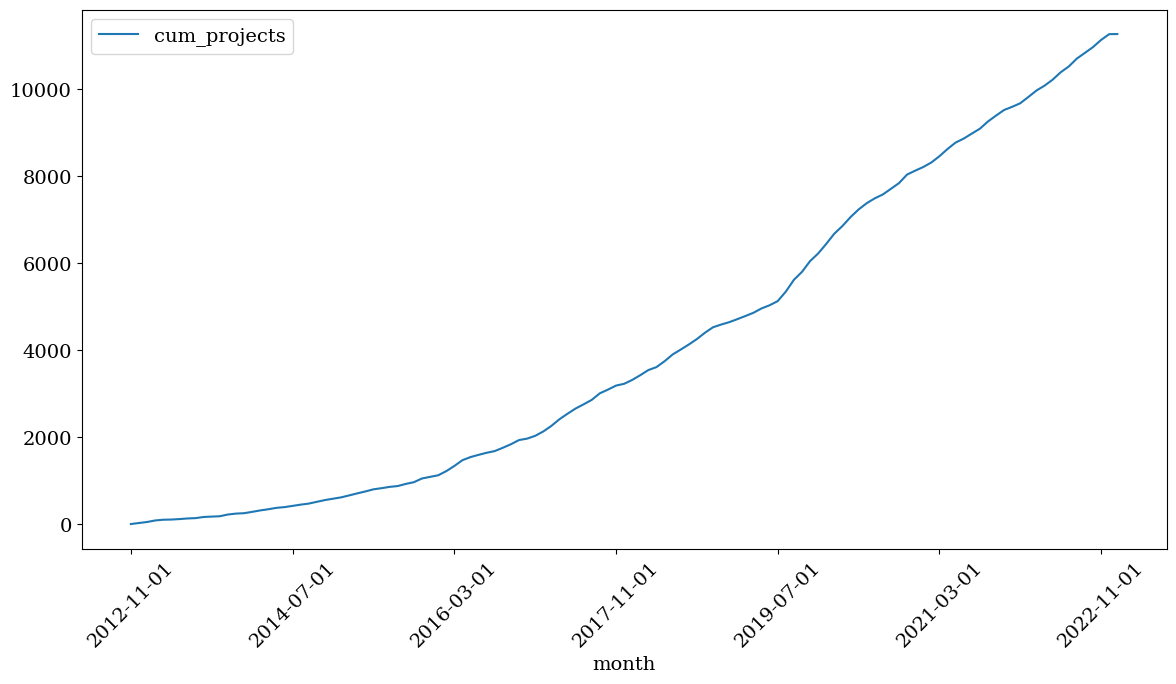

In [12]:
timeplot(activity,['cum_projects'])

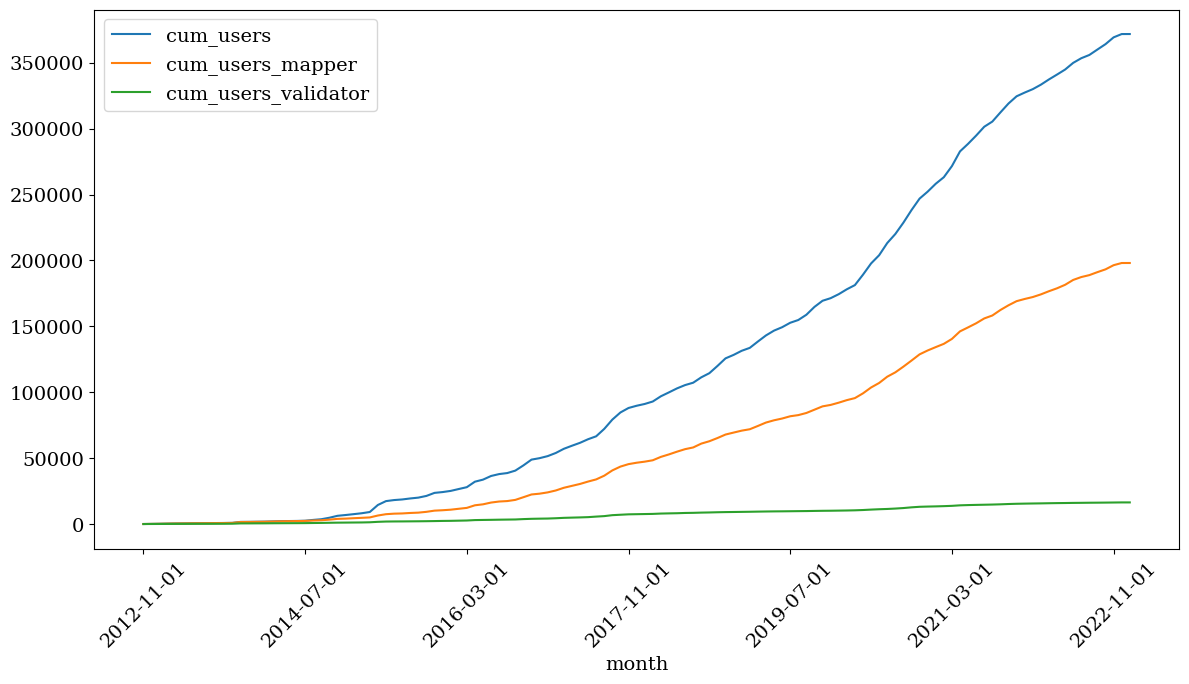

In [13]:
timeplot(activity,['cum_users', 'cum_users_mapper', 'cum_users_validator'])

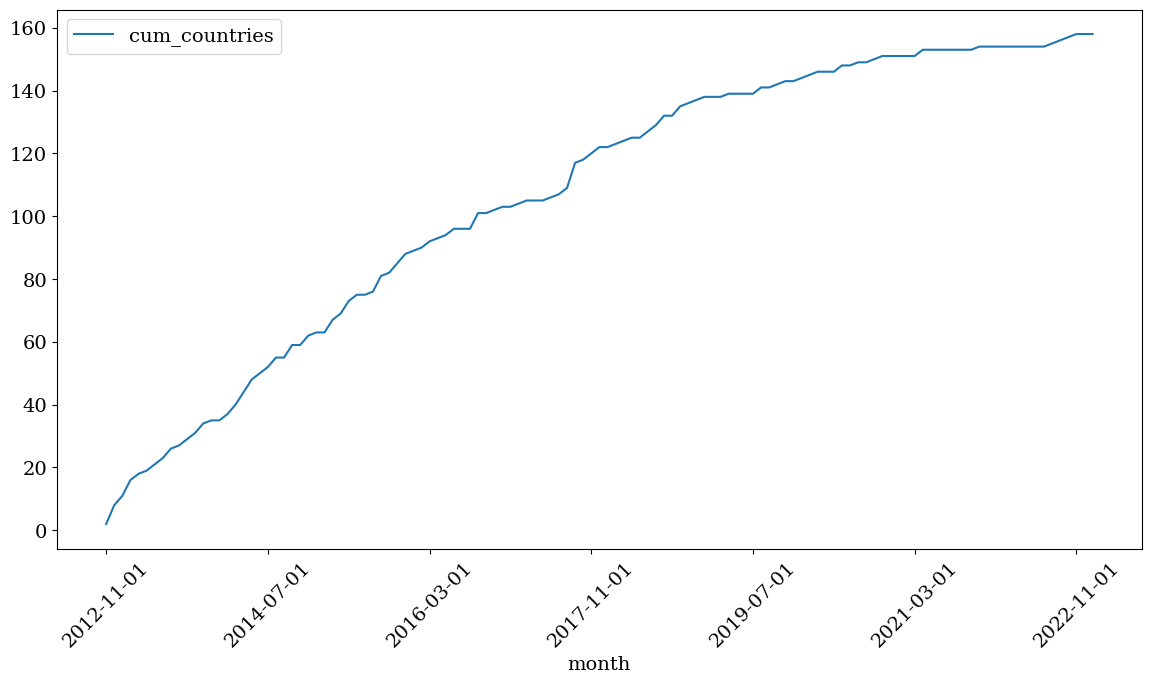

In [14]:
timeplot(activity,['cum_countries'])